In [2]:
using Pkg
using Interpolations

┌ Info: Recompiling stale cache file C:\Users\hasti\.julia\compiled\v1.1\Interpolations\VpKVx.ji for Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1184


In [3]:
using NRRD
using PyPlot
using FileIO

┌ Info: Recompiling stale cache file C:\Users\hasti\.julia\compiled\v1.1\NRRD\QVxCn.ji for NRRD [9bb6cfbd-7763-5393-b1b5-1c8e09872146]
└ @ Base loading.jl:1184


In [4]:
img = load("F:\\pancreas-ct\\converted_from_dicom\\Pancreas_15.nrrd")
0

0

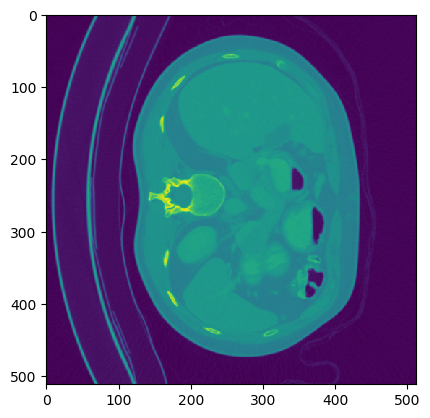

PyObject <matplotlib.image.AxesImage object at 0x0000000041E28208>

In [5]:
imshow(img.data[:, :,156])

In [185]:
using AxisArrays

In [9]:
using StaticArrays

In [184]:
interp = extrapolate(interpolate(img.data, BSpline(Linear())), -1000)
0

0

In [95]:
Vec3 = SVector{3, Float64}

interp = extrapolate(interpolate(img.data, BSpline(Linear())), -1000)

function spacegrid(origin::Vec3, u::Vec3, v::Vec3, xs, ys)
    return ((a, b) -> origin .+ a .* u .+ b .* v).(xs, ys')
end

function spacegrid(origin, u, v, xs=-150:150, ys=-150:150)
    return spacegrid(Vec3(origin), Vec3(u), Vec3(v), xs, ys)
end


function sample(interp, grid)
    return (x->interp(x...)).(grid)
end

sample (generic function with 1 method)

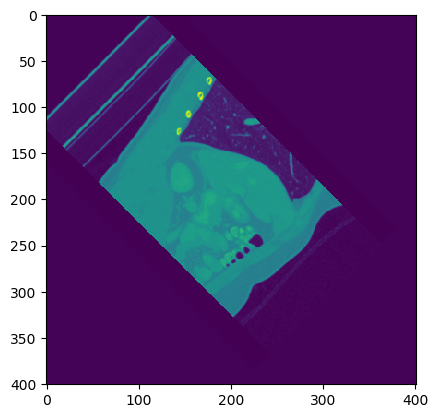

PyObject <matplotlib.image.AxesImage object at 0x000000000258D278>

In [30]:
slice = sample(interp, spacegrid((200, 300, 150), (0, 1, 1), (0, 1, -1), -200:200, -200:200))

imshow(slice)

In [186]:
#code_native(sample, (typeof(interp), typeof(spacegrid((0, 0, 0), (1, 1, 1), (1, 0, 0)))), syntax=:intel)

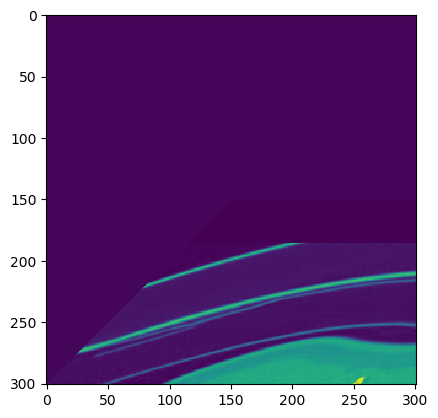

PyObject <matplotlib.image.AxesImage object at 0x00000000462147B8>

In [187]:
imshow(sample(interp, spacegrid((0, 0, 0), (1, 1, 1), (1, 0, 0))))

In [41]:
function randomVec()
    v = Vec3((rand() - .5, rand() - .5, rand() - .5))
    return v ./ sqrt(sum(v .* v))
end

randomVec (generic function with 1 method)

In [33]:
using Random

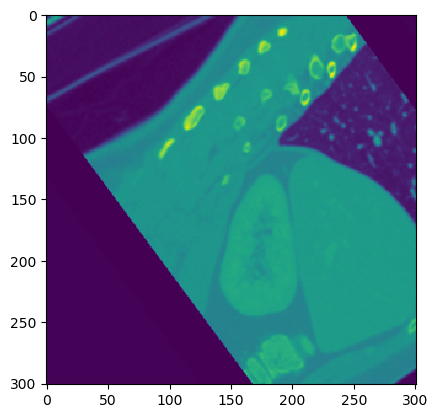

PyObject <matplotlib.image.AxesImage object at 0x00000000463AD320>

In [188]:
a = randomVec()
b = randomVec()
b = b .- sum(a.*b) .* a
b = b / sum(b .* b)

imshow(sample(interp, spacegrid((200, 200, 200), a, b)))

In [166]:
a = img.axes[1]


function center(r::StepRange)
    return Float64((r.start + r.stop)/2)
end
function center(r::StepRangeLen)
    return Float64(r.len * r.step * .5 + r.offset)
end

function norm(x::Vec3)
    return sqrt(sum(x.*x))
end

norm (generic function with 1 method)

In [169]:
function center(img::AxisArray)
    return Vec3((x->center(x.val)).(img.axes))
end
center(img)

3-element SArray{Tuple{3},Float64,1,3}:
  181.0
 -179.0
 -154.5

In [129]:
function cross(a, b)
    return Vec3((a[2]*b[3] - a[3] * b[2], a[3] * b[1] - a[1] * b[3], a[1] * b[2] - a[2] * b[1]))
end

cross (generic function with 1 method)

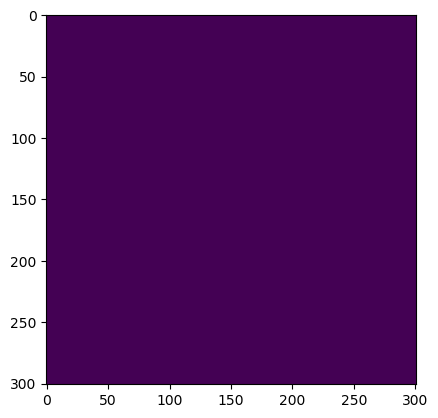

PyObject <matplotlib.image.AxesImage object at 0x00000000460FFC50>

In [183]:
a = randomVec()
b = randomVec()
b = b .- sum(a.*b) .* a
b = b / sum(b .* b)

c = center(img) .+ cross(a, b) .* (rand() - .5) .* norm(center(img))




imshow(sample(interp, spacegrid(c, a, b)))